<a href="https://colab.research.google.com/github/Laoode/SentiFeedback/blob/Agus_Workspace/Senti_Feedback_Englishversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [2]:
import pandas as pd


In [6]:
df = pd.read_csv('/content/feedback_student.csv', encoding='latin1')

In [17]:
df

,Id,comment,quality
0,45881,"Rand was a good guy, really... he was. But I f...",awful
1,45881,"He is brilliant in his field, but expects his ...",poor
2,45881,He has a major in philosophy which is why all ...,awful
3,45881,I thought his class was extremely hard but des...,good
4,45881,I recently just finished taking Comp 110 with ...,poor
...,...,...,...
2338,64144,He was a funny guy but a horendous teacher. Al...,poor
2339,64144,Prof Graves is a very interesting man...if you...,average
2340,64144,"He's really disoriented, but a really cool guy...",average
2342,64144,Horrible,average


In [9]:
df.isna().sum()

,0
Id,0
comment,0
quality,0


In [12]:
print("Data duplicated: ", df.duplicated().sum())

Data duplicated:  0


In [14]:
# df.describe()

In [15]:
df.describe(include='all')

,Id,comment,quality
count,2.307000e+03,2307,2307
unique,NaN,2274,5
top,NaN,No Comments,awesome
freq,NaN,34,618
mean,3.236929e+05,NaN,NaN
std,3.341458e+05,NaN,NaN
min,4.588100e+04,NaN,NaN
25%,1.091930e+05,NaN,NaN
50%,1.580880e+05,NaN,NaN
75%,3.196410e+05,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2307 entries, 0 to 2343
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       2307 non-null   int64 
 1   comment  2307 non-null   object
 2   quality  2307 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.1+ KB


Grouping by quality


In [18]:
grouped_data = df.groupby('quality')

print(grouped_data.size())


quality
average    380
awesome    618
awful      481
good       440
poor       388
dtype: int64


In [20]:
df['comment_length'] = df['comment'].str.len()
average_length = grouped_data['comment_length'].mean()
print(average_length)

# ID unik per 'quality' grupnya
unique_ids = grouped_data['Id'].nunique()
print(unique_ids)


quality
average    257.763158
awesome    228.558252
awful      226.916840
good       246.959091
poor       245.306701
Name: comment_length, dtype: float64
quality
average    16
awesome    17
awful      17
good       17
poor       16
Name: Id, dtype: int64


<ipython-input-20-d7d443c998b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_length'] = df['comment'].str.len()


Visualisasi

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

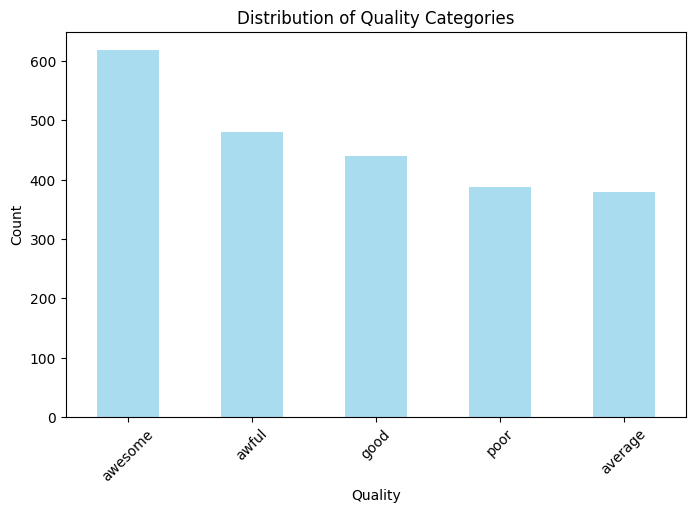

In [22]:
# Jumlah data per kategori
quality_counts = df['quality'].value_counts()

# Buat bar chart
plt.figure(figsize=(8, 5))
quality_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of Quality Categories')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-23-fa45d3a9e440>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_length'] = df['comment'].str.len()
<ipython-input-23-fa45d3a9e440>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='quality', y='comment_length', palette='Set3')


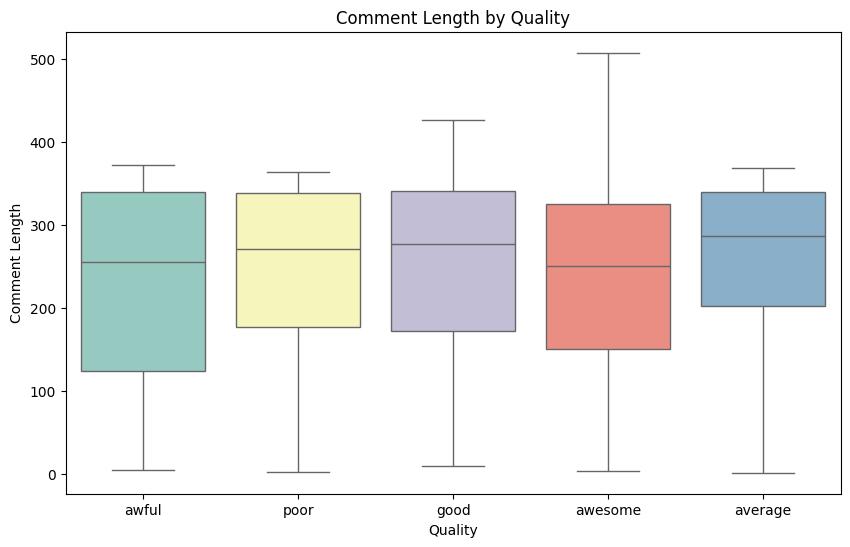

In [23]:
# panjang komentar
df['comment_length'] = df['comment'].str.len()

# Boxplot panjang komentar
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='quality', y='comment_length', palette='Set3')
plt.title('Comment Length by Quality')
plt.xlabel('Quality')
plt.ylabel('Comment Length')
plt.show()


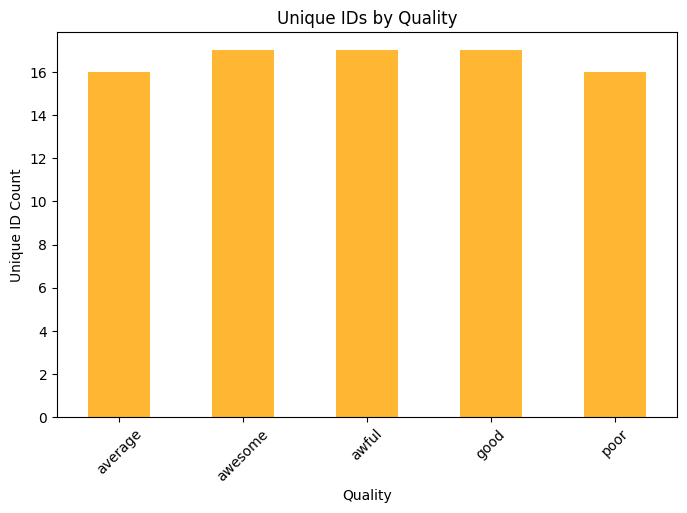

In [24]:
# Gruping pakai 'quality' dan menghitung ID unik
id_counts = df.groupby('quality')['Id'].nunique()

# Plot bar chart
plt.figure(figsize=(8, 5))
id_counts.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Unique IDs by Quality')
plt.xlabel('Quality')
plt.ylabel('Unique ID Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-25-86c64d638d5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='quality', y='comment_length', jitter=True, palette='Set2', alpha=0.6)


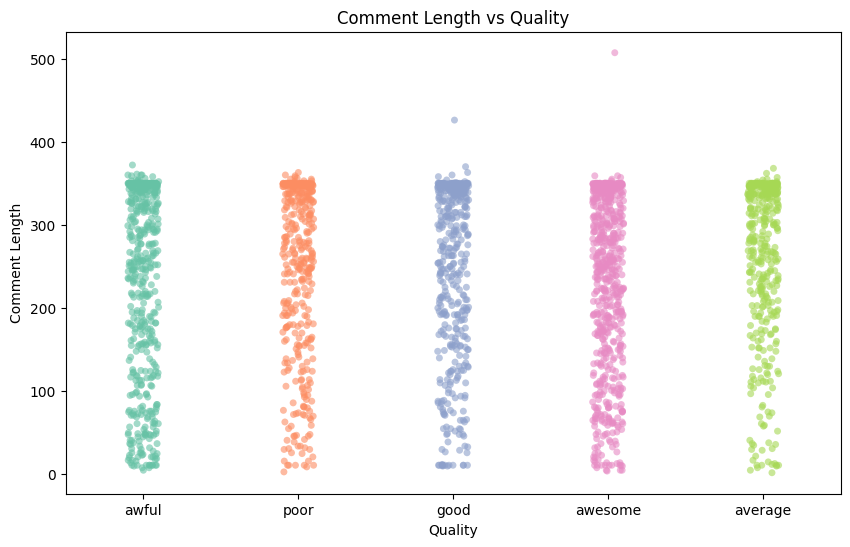

In [25]:
# Scatter plot untuk panjang komentar dan kualitas
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='quality', y='comment_length', jitter=True, palette='Set2', alpha=0.6)
plt.title('Comment Length vs Quality')
plt.xlabel('Quality')
plt.ylabel('Comment Length')
plt.show()


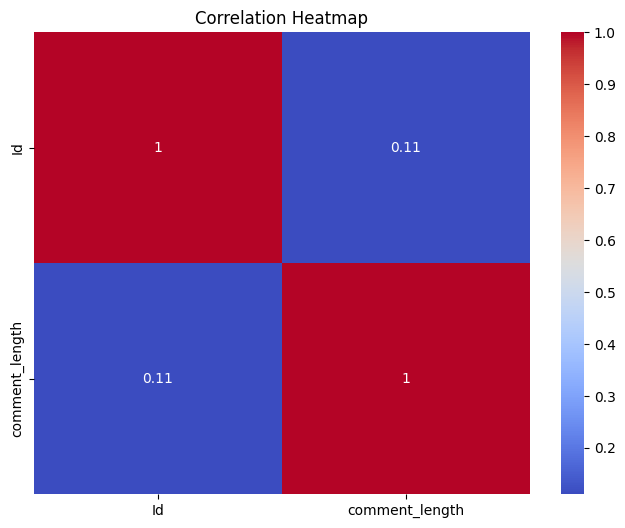

In [27]:
# Sebenarnya heatmapnya gaperlu, tapi aku isi aja. cheers :v
numerical_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [28]:
!pip install wordcloud


In [29]:
from wordcloud import WordCloud
print("WordCloud installed successfully!")


WordCloud installed successfully!


In [30]:
from wordcloud import WordCloud


Pengelompokan berdasarkan coment

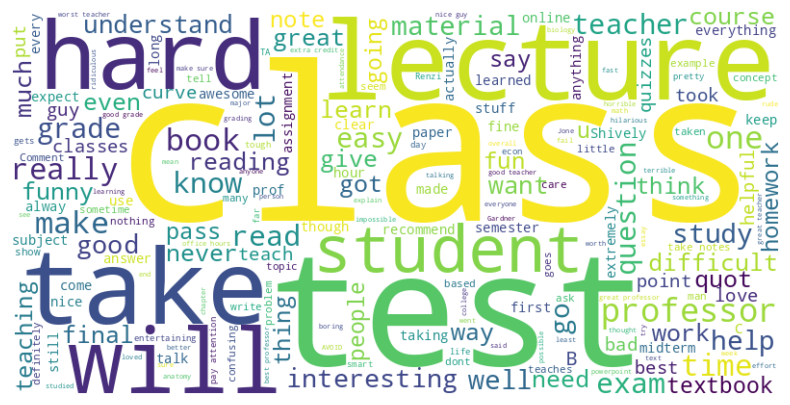

In [37]:
# Gabungin semua komentar menjadi satu string
all_comments = ' '.join(df['comment'].dropna())

# Ngebuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_comments)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Word Cloud of Comments', fontsize=16)
plt.show()


Sama, tapi menghilangkan kata umum. seperti 'and','the','is',dll...

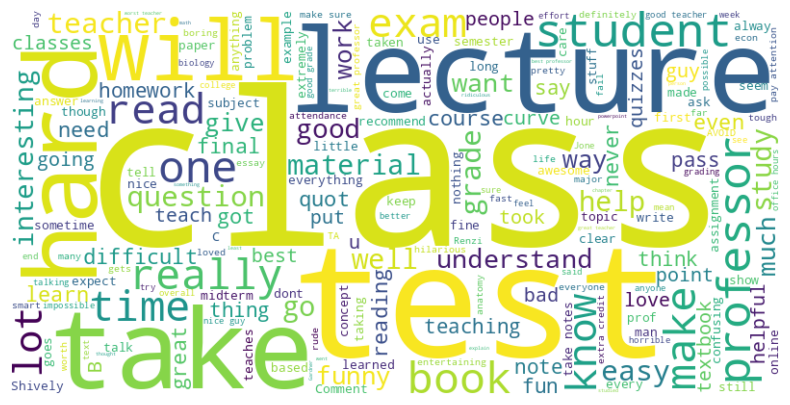

In [38]:
from wordcloud import STOPWORDS

# Daftar stopwords
stopwords = set(STOPWORDS)

# Word Cloud pakai stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='viridis').generate(all_comments)

# Tampilan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Word Cloud with Stopwords Removed', fontsize=16)
plt.show()


# Model, pakai Bidirectional LSTM Network

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

Pra-Proses Data

In [57]:
# Encoding labelnya
sentiment_mapping = {'awful': 0, 'poor': 1, 'average': 2, 'good': 3, 'excellent': 4}
df['quality_encoded'] = df['quality'].map(sentiment_mapping)

print("Number of NaN values in 'quality_encoded':", df['quality_encoded'].isnull().sum())
df.dropna(subset=['quality_encoded'], inplace=True)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['comment'])

print("Unique values in 'quality_encoded':", df['quality_encoded'].unique())

# Konversi text menjadi sequences
sequences = tokenizer.texts_to_sequences(df['comment'])
word_index = tokenizer.word_index

# Padding sequences
padded_sequences = pad_sequences(sequences, maxlen=100, truncating='post', padding='post')

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['quality_encoded'], test_size=0.2, random_state=42)

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


<ipython-input-57-1210fd19607c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality_encoded'] = df['quality'].map(sentiment_mapping)
<ipython-input-57-1210fd19607c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['quality_encoded'], inplace=True)


Number of NaN values in 'quality_encoded': 0
Unique values in 'quality_encoded': [0 1 3 2]
Unique values in y_train: [0 1 2 3]
Unique values in y_test: [0 1 2 3]


In [62]:
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')  # Coba 5 dulu
])

# Build model
model.build(input_shape=(None, 100))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_22 (Bidirectional)     │ (None, 100, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_23 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 749,509 (2.86 MB)

 Trainable params: 749,509 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step - accuracy: 0.2433 - loss: 1.5565 - val_accuracy: 0.2841 - val_loss: 1.4328
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - accuracy: 0.2637 - loss: 1.4674 - val_accuracy: 0.3690 - val_loss: 1.3956
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.3634 - loss: 1.3795 - val_accuracy: 0.4133 - val_loss: 1.2865
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.4889 - loss: 1.1723 - val_accuracy: 0.4428 - val_loss: 1.2240
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.5270 - loss: 1.0309 - val_accuracy: 0.4391 - val_loss: 1.2224
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.6161 - loss: 0.8708 - val_accuracy: 0.4576 - val_loss: 1.2966
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step - accuracy: 0.6621 - loss: 0.7939 - val_accuracy: 0.4280 - val_loss: 1.3941
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.7537 - loss: 0.6245 - val_accuracy:

In [68]:
# Evaluasi model pakai data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4043 - loss: 1.9820
Test Loss: 1.855802059173584
Test Accuracy: 0.417159765958786


Bentar yak, nanti tak perbaiki

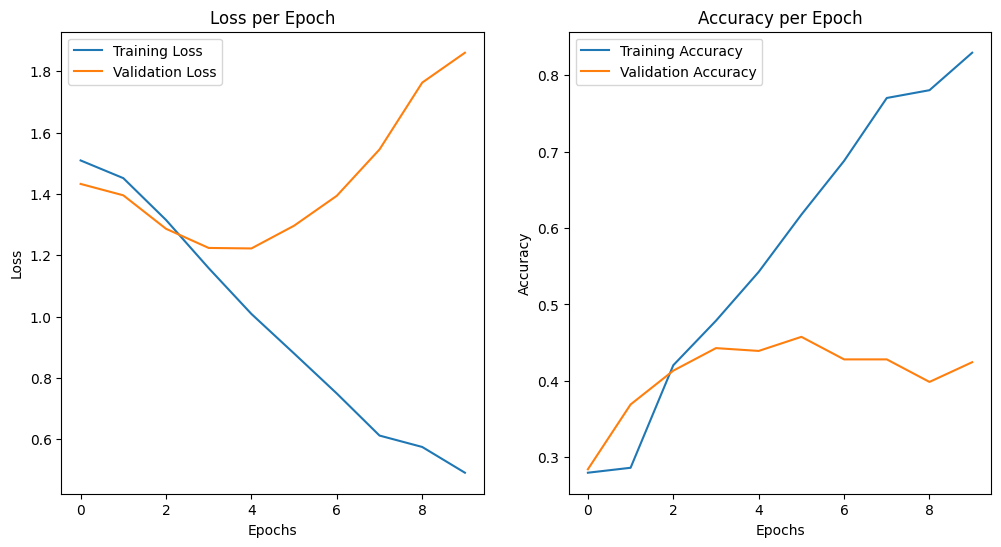

In [67]:
history_dict = history.history

# Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Akurasi
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

T_T, gajelas sama overfitting parah

Coba pakai untuk data baru

In [70]:
# Buat proses komentar baru smaa prediksi kualitasnya
def predict_quality(comment):
    # Tambah Tokenisasi dan padding komentar baru
    comment_seq = tokenizer.texts_to_sequences([comment])
    comment_padded = pad_sequences(comment_seq, maxlen=100, truncating='post', padding='post')

    # Prediksi
    prediction = model.predict(comment_padded)

    # Gatau fungsinya, tapi dapet dari github orang, kayanya kembaliin label sentimen yang tertinggi
    sentiment = np.argmax(prediction, axis=1)
    sentiment_mapping_rev = {v: k for k, v in sentiment_mapping.items()}
    predicted_label = sentiment_mapping_rev[sentiment[0]]

    return predicted_label

# Contoh prediksi untuk komentar baru
new_comment = "The exam is horrible and bad."
predicted_quality = predict_quality(new_comment)
print(f"The predicted quality for the comment is: {predicted_quality}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The predicted quality for the comment is: awful


Nanti kuperbaiki, cheers ✌ 😿